Min tolkning av kolonnene. Med hjelp fra google gemini

- Diabetes_binary: 0.0 hvis nei, 1.0 hvis prediabetes, 2.0 hvis diabetes
  - ingen i dette datasettet er 2.0, som beskrevet i oppgaveteksten
  - Navnet tilsier at det er en binary verdi
- HighBP: binary: har høyt blodtrykk
- HighChol: binary: har høyt kolesterol
- CholCheck: cholesterol checked
- BMI: float: Body Mass Index
- Smoker: binary: røyker eller ikke
- Stroke: binary: has had stroke
- HeartDiseaseorAttack: binary: has had heart disease / attack
- PhysActivity: binary: has had physical activity
- Fruits: binary: consumed fruits
- Veggies: binary: consumed vegetables
- HvyAlcoholConsump: binary: heavy alcohol consumption
- AnyHealthcate: binary: healthcare coverage
- NoDocbcCost: binary: could not afford doctor in past 12 months
- GenHlth: enum [1, 2, 3, 4, 5]: general health. 1 is best.
- MentHlth: int: days with bad mental health in past 30 days
- PhysHlth: int: days with bad physical health in past 30 days
- DiffWalk: binary: difficulty walking
- Sex: binary: gender, likely 0 female, 1 male
- Age: int: age group age ranges in 13 levels
- Education: enum [1, 2, 3, 4, 5, 6]: education level. 1 = never attended school or kindergarten, etc
- Income: int: income level in categories

In [18]:
import pandas as pd
from matplotlib import pyplot as plt

In [5]:
df = pd.read_csv("datasett/diabetes.csv")

In [6]:
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [48]:
def get_age(age: int) -> str:
    # 13-level age categories. There are no set rules, but this is extrapolated from the available information in the task.
    ages = {
        1: "18-24",
        2: "25-29",
        3: "30-34",
        4: "35-39",
        5: "40-44",
        6: "45-49",
        7: "50-54",
        8: "55-59",
        9: "60-64",
        10: "65-69",
        11: "70-74",
        12: "75-79",
        13: "80+"
    }
    return ages.get(age, "Invalid age")

<Axes: ylabel='count'>

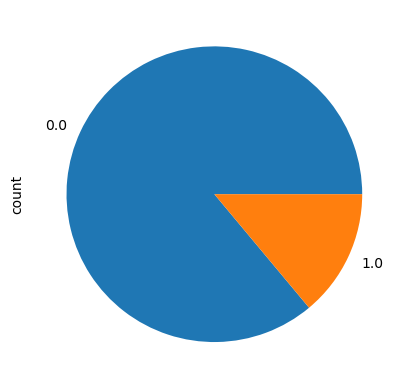

In [9]:
df["Diabetes_binary"].value_counts().plot(kind="pie")

(array([6.8000e+01, 4.8000e+02, 2.5790e+03, 1.0295e+04, 2.3498e+04,
        3.5160e+04, 6.2314e+04, 3.1435e+04, 2.6848e+04, 1.9422e+04,
        1.2756e+04, 8.7800e+03, 6.3080e+03, 5.5560e+03, 2.5430e+03,
        1.5690e+03, 1.1060e+03, 7.8800e+02, 4.6800e+02, 3.5000e+02,
        3.6400e+02, 1.2500e+02, 9.8000e+01, 7.7000e+01, 4.3000e+01,
        2.8000e+01, 3.8000e+01, 6.3000e+01, 6.3000e+01, 5.5000e+01,
        5.6000e+01, 6.8000e+01, 8.6000e+01, 4.7000e+01, 6.2000e+01,
        3.0000e+01, 2.0000e+00, 3.2000e+01, 1.2000e+01, 8.0000e+00]),
 array([12.  , 14.15, 16.3 , 18.45, 20.6 , 22.75, 24.9 , 27.05, 29.2 ,
        31.35, 33.5 , 35.65, 37.8 , 39.95, 42.1 , 44.25, 46.4 , 48.55,
        50.7 , 52.85, 55.  , 57.15, 59.3 , 61.45, 63.6 , 65.75, 67.9 ,
        70.05, 72.2 , 74.35, 76.5 , 78.65, 80.8 , 82.95, 85.1 , 87.25,
        89.4 , 91.55, 93.7 , 95.85, 98.  ]),
 <BarContainer object of 40 artists>)

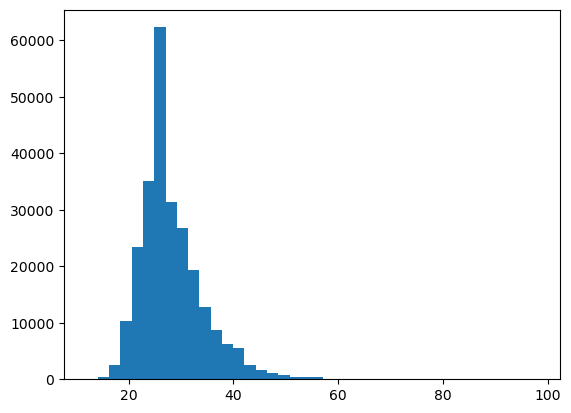

In [32]:
plt.hist(df["BMI"], bins=40)

<Axes: ylabel='count'>

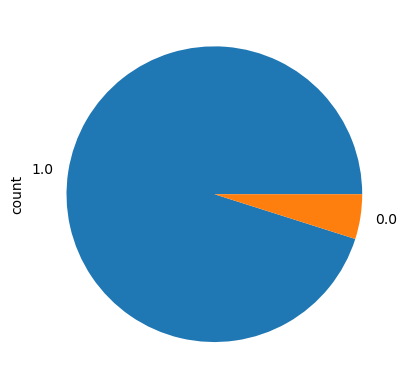

In [36]:
df["AnyHealthcare"].value_counts().plot(kind="pie")

<Axes: ylabel='count'>

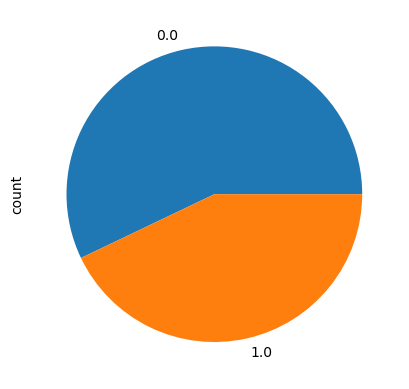

In [37]:
df["HighBP"].value_counts().plot(kind="pie")

<Axes: ylabel='count'>

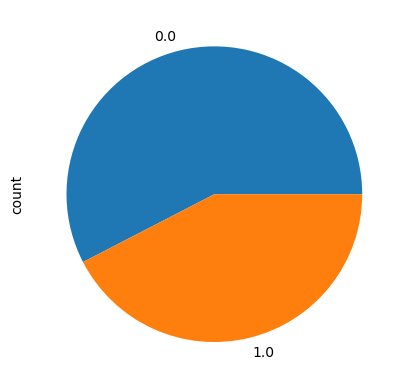

In [38]:
df["HighChol"].value_counts().plot(kind="pie")

<Axes: xlabel='Age'>

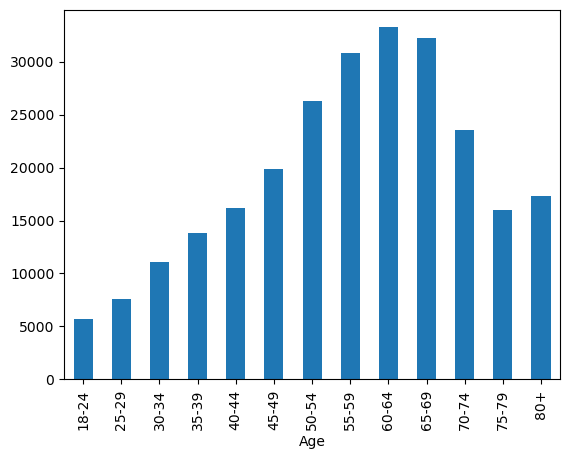

In [49]:
df["Age"].apply(get_age).value_counts().sort_index().plot(kind="bar")

In [50]:
df["Sex"].value_counts()

Sex
0.0    141974
1.0    111706
Name: count, dtype: int64

In [51]:
df["BMI"].mean()

np.float64(28.382363607694735)

<Axes: ylabel='count'>

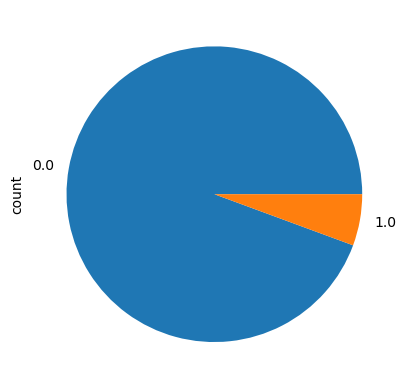

In [54]:
df["HvyAlcoholConsump"].value_counts().plot(kind="pie")

<Axes: ylabel='count'>

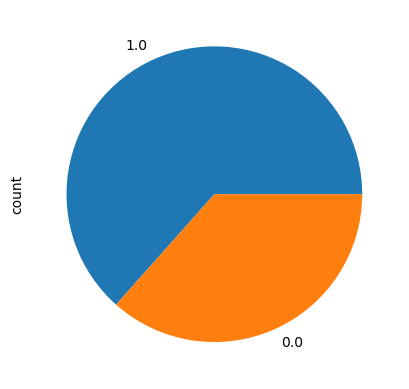

In [57]:
df["Fruits"].value_counts().plot(kind="pie")

<Axes: ylabel='count'>

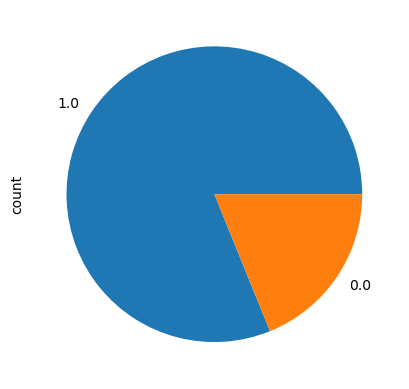

In [58]:
df["Veggies"].value_counts().plot(kind="pie")

<Axes: ylabel='count'>

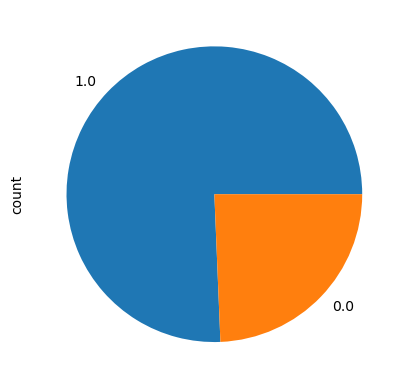

In [60]:
df["PhysActivity"].value_counts().plot(kind="pie")

<Axes: ylabel='count'>

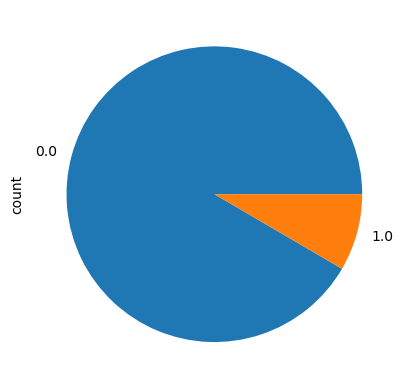

In [63]:
df["NoDocbcCost"].value_counts().plot(kind="pie")

<Axes: xlabel='Education'>

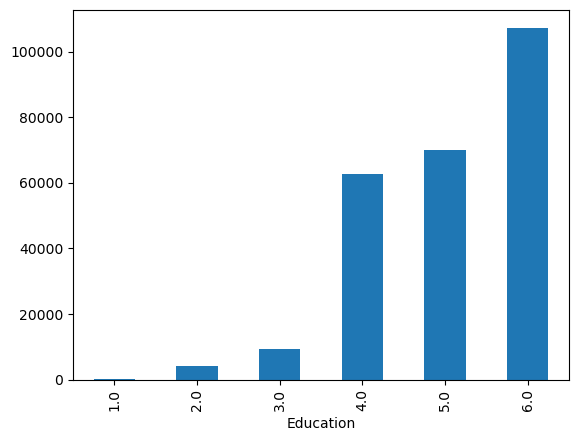

In [67]:
df["Education"].value_counts().sort_index().plot(kind="bar")

<Axes: xlabel='GenHlth'>

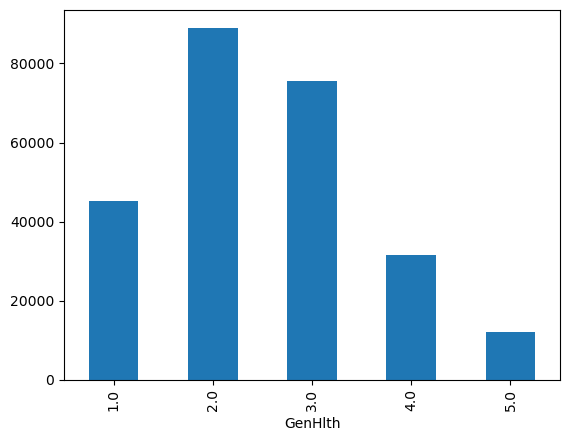

In [69]:
df["GenHlth"].value_counts().sort_index().plot(kind="bar")

<Axes: xlabel='MentHlth'>

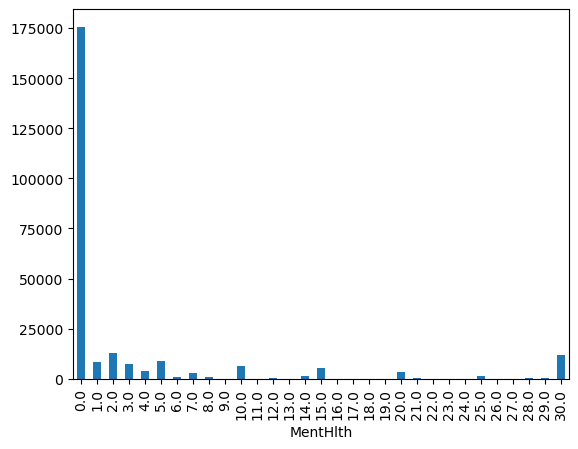

In [83]:
df["MentHlth"].value_counts().sort_index().plot(kind="bar")

<Axes: ylabel='Frequency'>

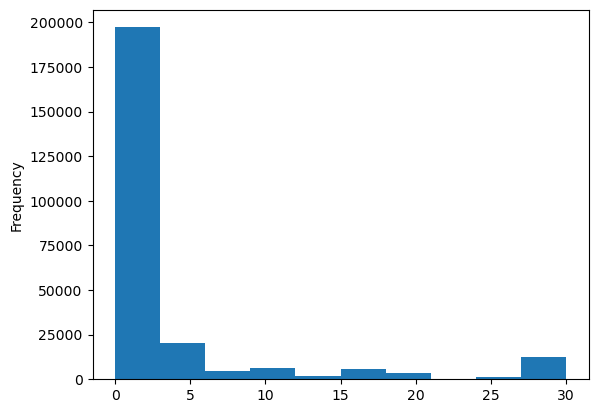

In [84]:
df["MentHlth"].plot(kind="hist")

<Axes: xlabel='Age,Diabetes_binary'>

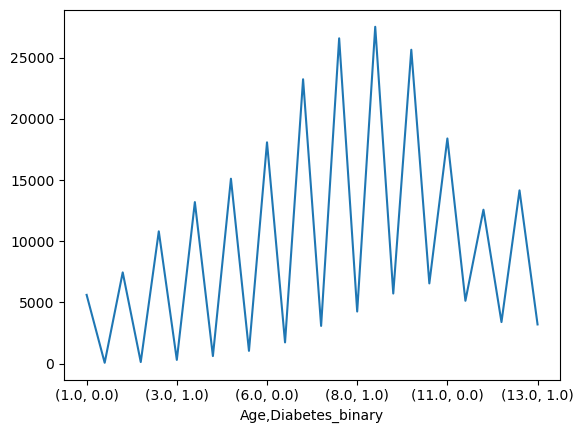

In [103]:
df.groupby("Age")["Diabetes_binary"].value_counts().plot(kind="line")

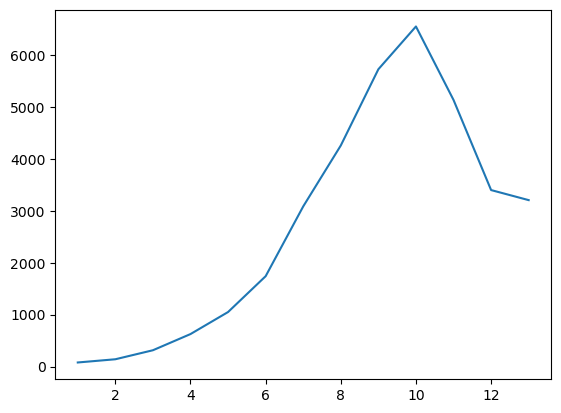

In [135]:
grouped = df[df["Diabetes_binary"] == 1.0].groupby(["Age"]).size().reset_index(name="count")

plt.plot(grouped["Age"], grouped["count"])

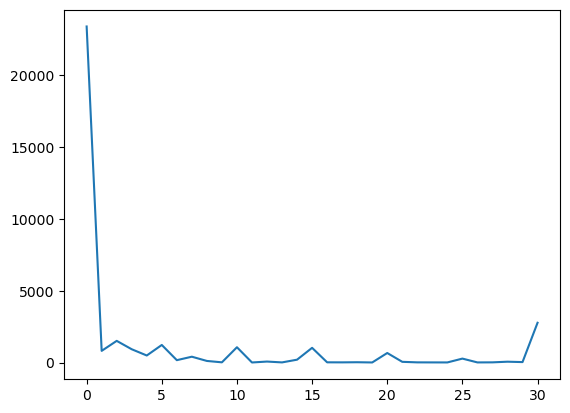

In [136]:
grouped = df[df["Diabetes_binary"] == 1.0].groupby(["MentHlth"]).size().reset_index(name="count")

plt.plot(grouped["MentHlth"], grouped["count"])

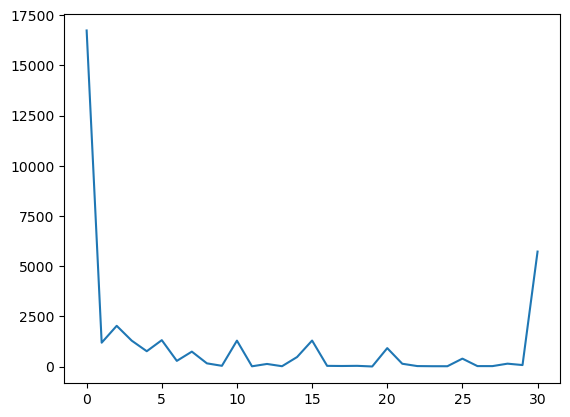

In [137]:
grouped = df[df["Diabetes_binary"] == 1.0].groupby(["PhysHlth"]).size().reset_index(name="count")

plt.plot(grouped["PhysHlth"], grouped["count"])

In [142]:
df.groupby("Smoker")["Diabetes_binary"].value_counts()

Smoker  Diabetes_binary
0.0     0.0                124228
        1.0                 17029
1.0     0.0                 94106
        1.0                 18317
Name: count, dtype: int64

In [143]:
df.groupby("Age")["PhysHlth"].mean()

Age
1.0     1.984737
2.0     2.126744
3.0     2.468758
4.0     2.704116
5.0     3.104599
6.0     3.799788
7.0     4.456449
8.0     4.780099
9.0     4.792203
10.0    4.608716
11.0    4.700378
12.0    4.971902
13.0    5.526349
Name: PhysHlth, dtype: float64

<Axes: xlabel='Age'>

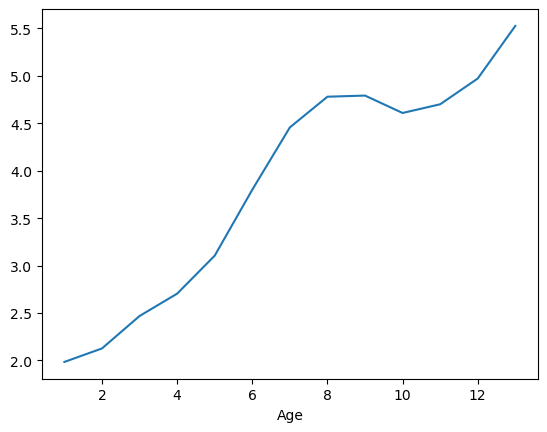

In [151]:
grouped = df.groupby(["Age"])["PhysHlth"].mean()

grouped.plot()

<Axes: xlabel='Education'>

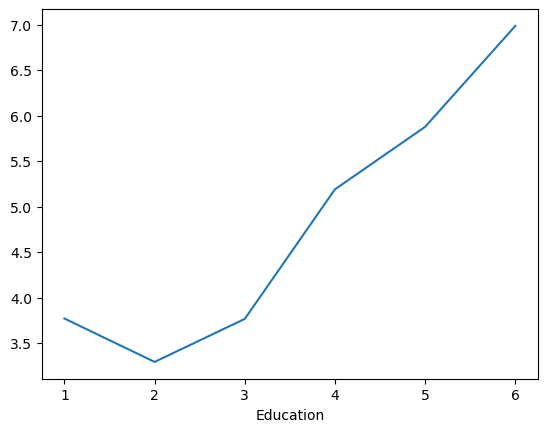

In [152]:
grouped = df.groupby(["Education"])["Income"].mean()

grouped.plot()

<Axes: xlabel='PhysHlth'>

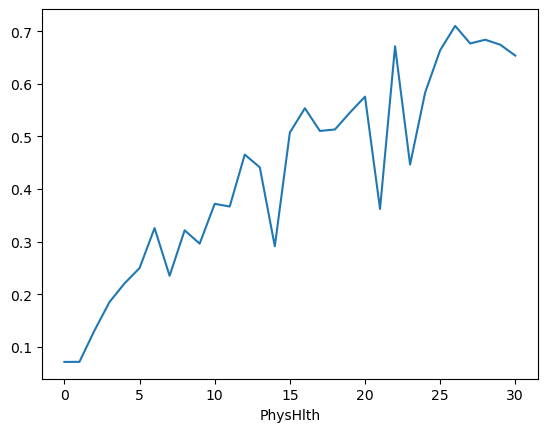

In [154]:
grouped = df.groupby(["PhysHlth"])["DiffWalk"].mean()

grouped.plot()